Importing necessary libraries

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
import random

# Understanding the data

In [138]:
train = pd.read_csv("/content/drive/MyDrive/Internships/MAERSK/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Internships/MAERSK/test.csv")

In [139]:
train.describe()

,Sourcing Cost
count,550176.000000
mean,108.817286
std,104.390093
min,-196.070000
25%,57.000000
50%,132.000000
75%,146.150000
max,32632.500000


In [140]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductType        550176 non-null  object 
 1   Manufacturer       550176 non-null  object 
 2   Area Code          550176 non-null  object 
 3   Sourcing Channel   550176 non-null  object 
 4   Product Size       550176 non-null  object 
 5   Product Type       550176 non-null  object 
 6   Month of Sourcing  550176 non-null  object 
 7   Sourcing Cost      550176 non-null  float64
dtypes: float64(1), object(7)
memory usage: 33.6+ MB


In [141]:
train.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76


In [142]:
test.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,Jun-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,Jun-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,Jun-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,Jun-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,Jun-21,169.42


In [143]:
# sorting data by date
df = train.copy()

df['Month of Sourcing'] = pd.to_datetime(df['Month of Sourcing'], format='%b-%y')
df = df.sort_values(by='Month of Sourcing')
df.reset_index(drop=True, inplace=True)

In [144]:
df.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A8,DIRECT,Large,Powder,2020-07-01,134.60
1,NTM2,X1,A29,DIRECT,Small,Powder,2020-07-01,56.52
2,NTM1,X1,A10,DIRECT,Large,Powder,2020-07-01,135.29
3,NTM1,X1,A3,DIRECT,Small,Powder,2020-07-01,136.92
4,NTM2,X1,A26,DIRECT,Small,Powder,2020-07-01,38.67


Plots

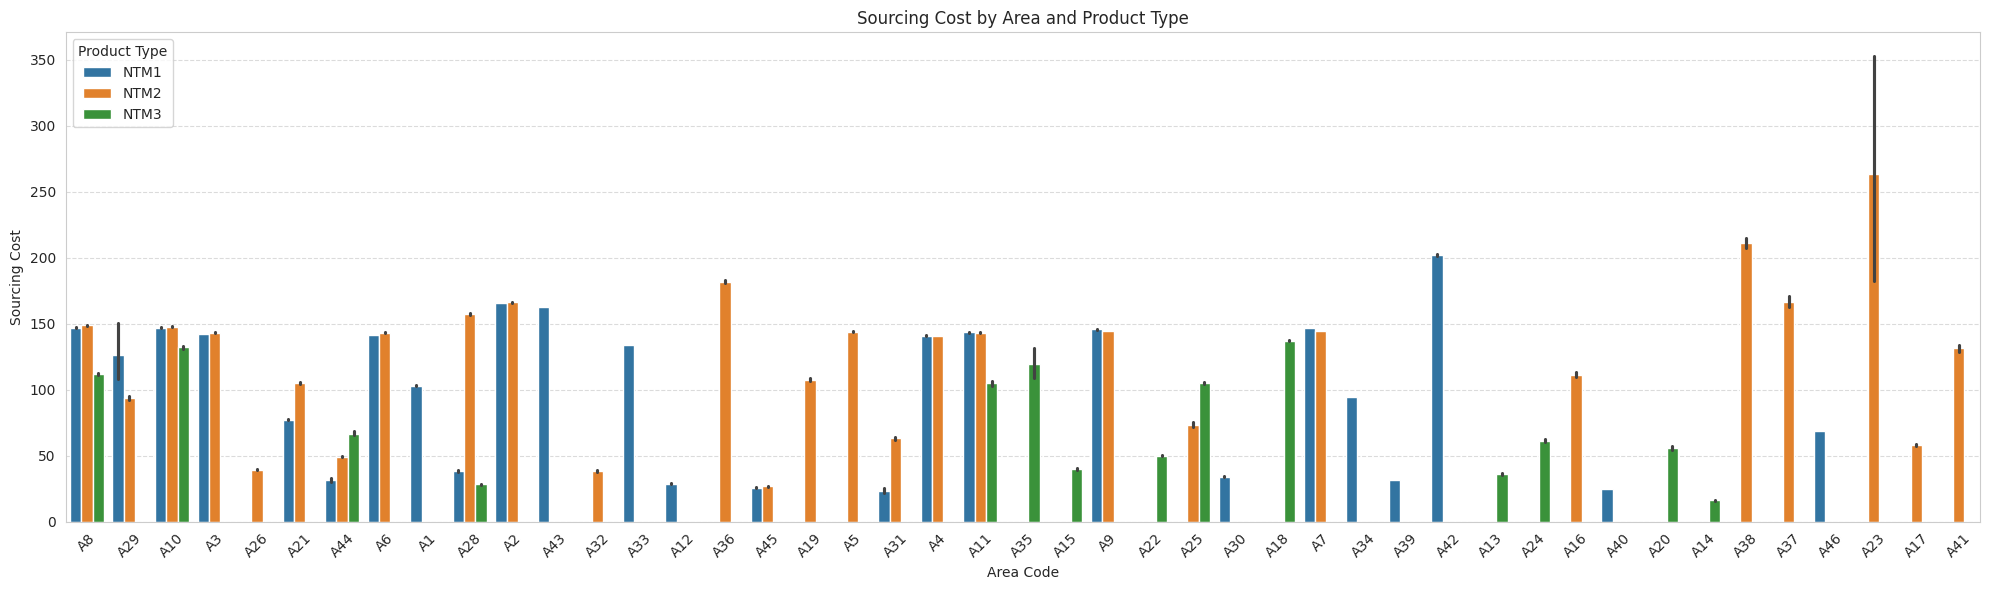

In [145]:
plt.figure(figsize=(20, 6))
sns.barplot(data=df, x='Area Code', y='Sourcing Cost', hue='ProductType')
plt.title('Sourcing Cost by Area and Product Type')
plt.xlabel('Area Code')
plt.ylabel('Sourcing Cost')
plt.xticks(rotation=45)
plt.legend(title='Product Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


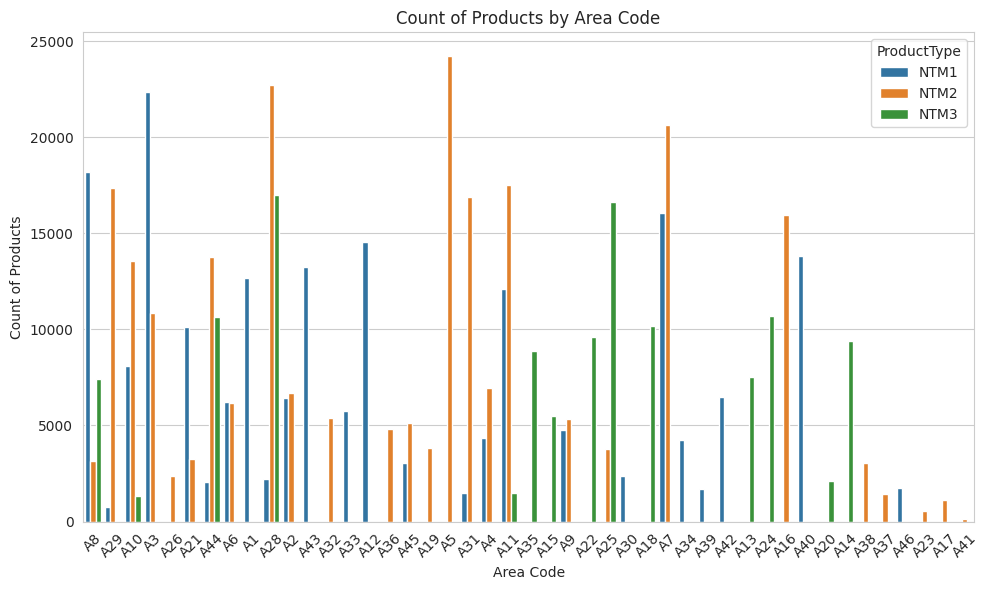

In [146]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Area Code', hue='ProductType')
plt.title('Count of Products by Area Code')
plt.xlabel('Area Code')
plt.ylabel('Count of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


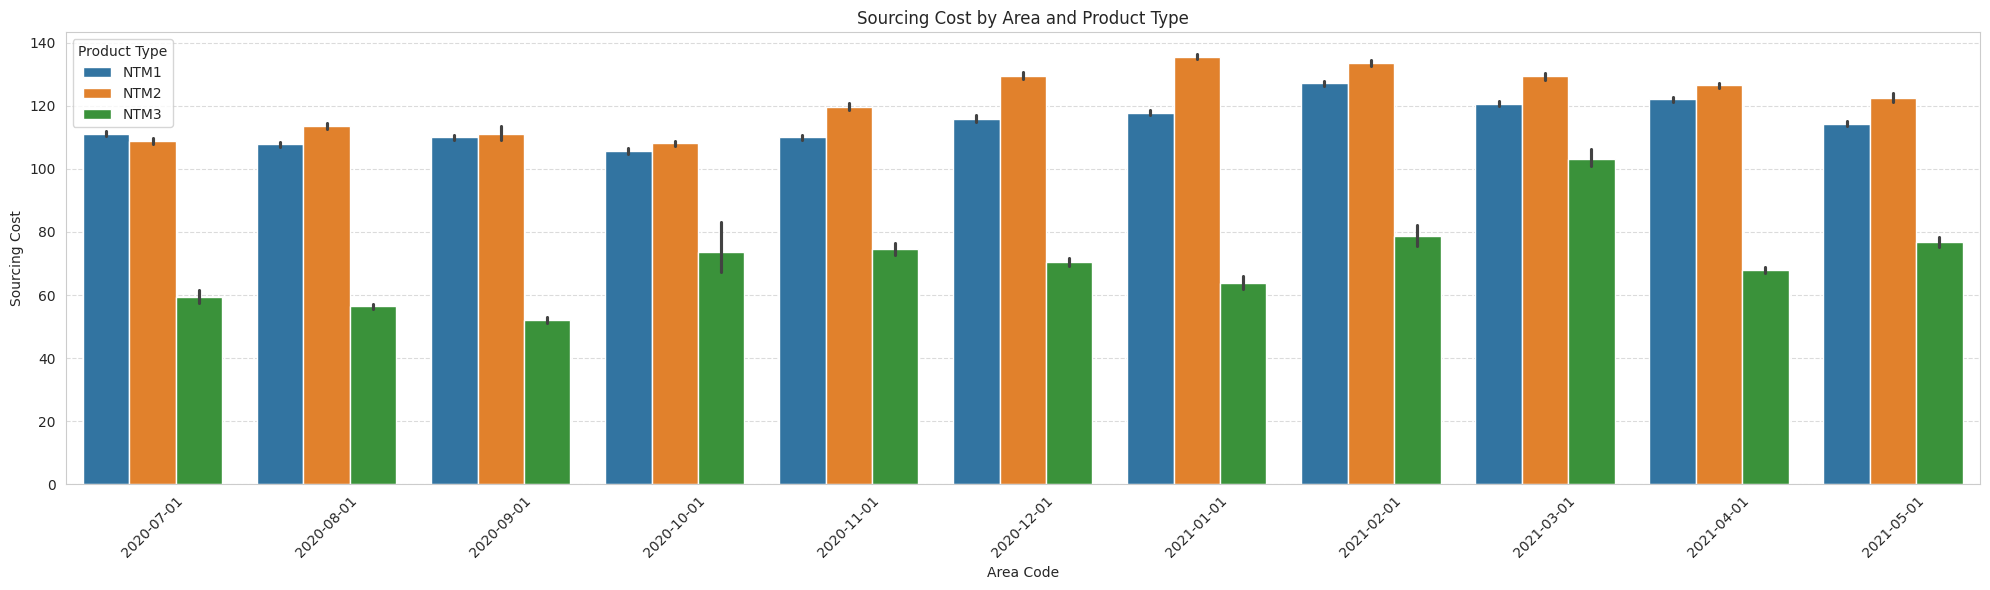

In [147]:
plt.figure(figsize=(20, 6))
sns.barplot(data=df, x='Month of Sourcing', y='Sourcing Cost', hue='ProductType')
plt.title('Sourcing Cost by Area and Product Type')
plt.xlabel('Area Code')
plt.ylabel('Sourcing Cost')
plt.xticks(rotation=45)
plt.legend(title='Product Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

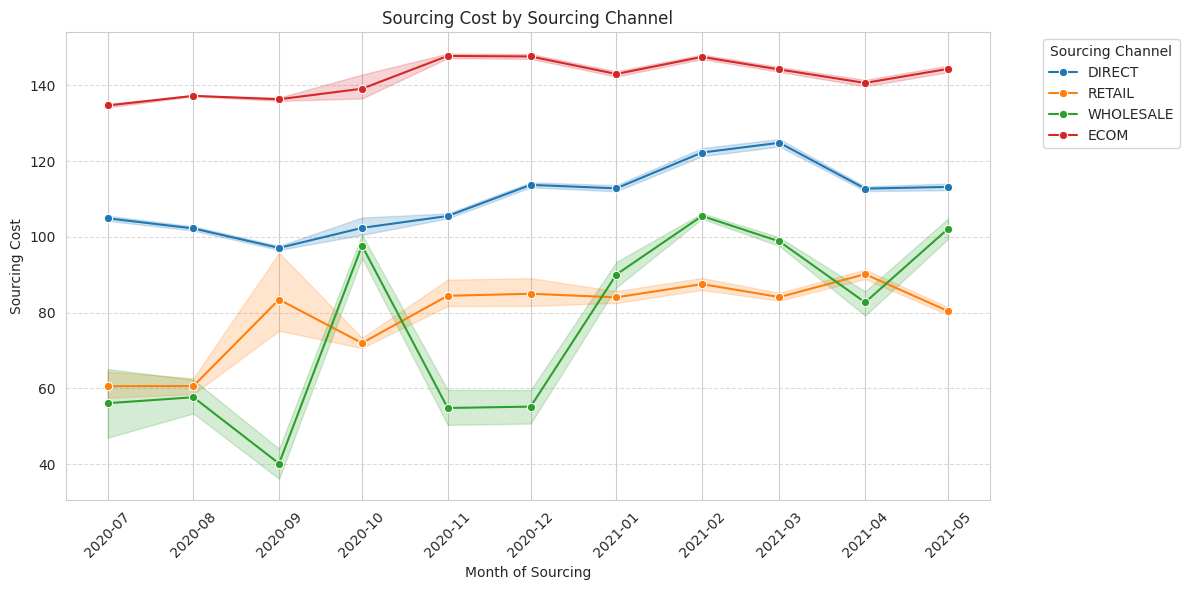

In [148]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Month of Sourcing', y='Sourcing Cost', hue='Sourcing Channel', marker='o')

plt.title('Sourcing Cost by Sourcing Channel')
plt.xlabel('Month of Sourcing')
plt.ylabel('Sourcing Cost')
plt.xticks(rotation=45)
plt.legend(title='Sourcing Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


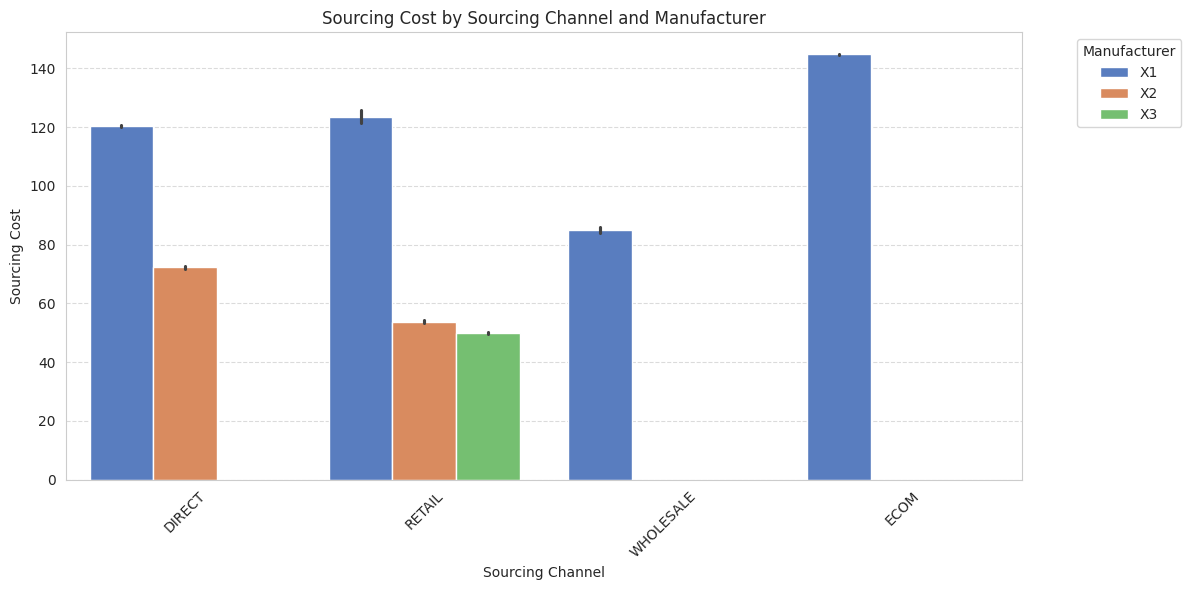

In [149]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Sourcing Channel', y='Sourcing Cost', hue='Manufacturer', palette='muted')

plt.title('Sourcing Cost by Sourcing Channel and Manufacturer')
plt.xlabel('Sourcing Channel')
plt.ylabel('Sourcing Cost')
plt.xticks(rotation=45)
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

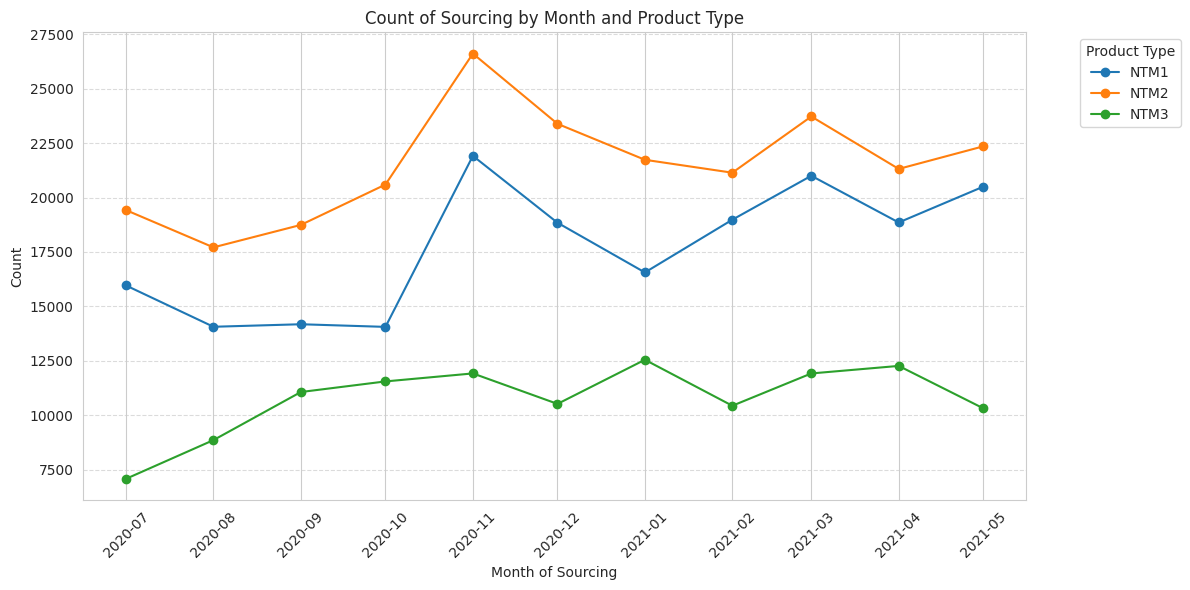

In [150]:
monthly_counts_by_product_type = df.groupby(['Month of Sourcing', 'ProductType']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 6))
for product_type in monthly_counts_by_product_type.columns:
    plt.plot(monthly_counts_by_product_type.index, monthly_counts_by_product_type[product_type], marker='o', label=product_type)

plt.title('Count of Sourcing by Month and Product Type')
plt.xlabel('Month of Sourcing')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Forecating model to get sourcing cost per combination



In [151]:
master_df = pd.concat([train, test], ignore_index= True)

In [152]:
master_df.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76


In [153]:
# check months
master_df['Month of Sourcing'].nunique()

12

In [154]:
master_df['Products'] = master_df.apply(lambda row: '_'.join([str(row['Manufacturer']), str(row['Area Code']), str(row['Sourcing Channel']),
                                            str(row['ProductType']), str(row['Product Size']), str(row['Product Type'])]), axis=1)

master_df.Products.nunique()

96

In [155]:
master_df = master_df.drop(columns = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type'])
master_df['Month of Sourcing'] = pd.to_datetime(master_df['Month of Sourcing'], format='%b-%y')
master_df = master_df.sort_values(by='Month of Sourcing')
master_df.reset_index(drop=True, inplace=True)

In [156]:
master_df.head()

,Month of Sourcing,Sourcing Cost,Products
0,2020-07-01,135.87,X1_A5_DIRECT_NTM2_Large_Powder
1,2020-07-01,113.44,X1_A1_DIRECT_NTM1_Small_Powder
2,2020-07-01,15.81,X1_A14_DIRECT_NTM3_Large_Liquid
3,2020-07-01,42.80,X1_A35_DIRECT_NTM3_Small_Liquid
4,2020-07-01,106.77,X2_A31_DIRECT_NTM2_Large_Powder


In [157]:
master_df['Month of Sourcing'].nunique()

12

In [158]:
# get a moving average column to keep an account of history movements
dates = master_df['Month of Sourcing'].unique()
products = master_df['Products'].unique()

for product in products:
  sum = 0
  count = 0
  for date in dates:
      mask = (master_df['Products'] == product) & (master_df['Month of Sourcing'] == date)
      subset_df = master_df[mask]

      sum += int(subset_df['Sourcing Cost'].sum())
      count += len(subset_df)

      # Calculate the moving average and assign it to the 'MA' column
      moving_avg = sum / count if count != 0 else 0
      master_df.loc[mask, 'MA'] = moving_avg

In [159]:
def weighted_mean(x):
    weights = x / x.sum()
    return np.average(x, weights=weights)

# Group by 'Month of Sourcing' and 'new1', then aggregate using weighted average for 'Sourcing Cost' and mean for 'MA'
df_m = master_df.groupby(['Month of Sourcing', 'Products']).agg({'Sourcing Cost': weighted_mean, 'MA': 'mean'}).reset_index()
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117 entries, 0 to 1116
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Month of Sourcing  1117 non-null   datetime64[ns]
 1   Products           1117 non-null   object        
 2   Sourcing Cost      1109 non-null   float64       
 3   MA                 1117 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 35.0+ KB


In [160]:

dates = df_m['Month of Sourcing'].unique()
products = df_m['Products'].unique()

for date in dates:
    for product in products:
        subset_df = df_m[(df_m['Month of Sourcing'] == date) & (df_m['Products'] == product)]
        if subset_df.empty:
            new_row = {'Month of Sourcing': date,
                       'Products': product,
                       'Sourcing Cost': np.mean(df_m[df_m['Products'] == product]['Sourcing Cost']),
                       'MA': np.mean(df_m[df_m['Products'] == product]['MA'])}
            new_df = pd.DataFrame([new_row])
            df_m = pd.concat([df_m, new_df], ignore_index=True)

In [161]:
df_m['Sourcing Cost'] = df_m['Sourcing Cost'].fillna(method='ffill')
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Month of Sourcing  1152 non-null   datetime64[ns]
 1   Products           1152 non-null   object        
 2   Sourcing Cost      1152 non-null   float64       
 3   MA                 1152 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 36.1+ KB


In [162]:
X = []
y = []
dates = df_m['Month of Sourcing'].unique()

# Iterate over dates, excluding the last date as there is no corresponding 'y' for it
for i in range(len(dates) - 1):
    # Filter data for the current date
    X_date = df_m[df_m['Month of Sourcing'] == dates[i]]
    y_date = df_m[df_m['Month of Sourcing'] == dates[i+1]]

    # Extract features and target for the current date
    X_features = X_date[['Sourcing Cost', 'MA']].values
    y_target = y_date['Sourcing Cost'].values

    # Append features and target to X and y, respectively
    X.append(X_features)
    y.append(y_target)

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Reshape X to have a shape of (num_samples, num_features)
X = X.reshape(X.shape[0], -1)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (11, 192)
Shape of y: (11, 96)


In [163]:
# ANN
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(y.shape[1])  # Output layer with 11 neurons for 11 products
])

# Compile the model
ann_model.compile(optimizer='adam', loss='mse')  # Use mean squared error as loss function

# Train the model
results = ann_model.fit(X, y, epochs=50, batch_size=12, verbose=1)

Epoch 1/50
1/1 [==============================] - 1s 646ms/step - loss: 714300.9375
Epoch 2/50
1/1 [==============================] - 0s 10ms/step - loss: 690788.9375
Epoch 3/50
1/1 [==============================] - 0s 9ms/step - loss: 670540.5625
Epoch 4/50
1/1 [==============================] - 0s 9ms/step - loss: 653150.3125
Epoch 5/50
1/1 [==============================] - 0s 11ms/step - loss: 638191.3750
Epoch 6/50
1/1 [==============================] - 0s 11ms/step - loss: 625126.0000
Epoch 7/50
1/1 [==============================] - 0s 9ms/step - loss: 613717.0000
Epoch 8/50
1/1 [==============================] - 0s 11ms/step - loss: 603474.4375
Epoch 9/50
1/1 [==============================] - 0s 11ms/step - loss: 594365.4375
Epoch 10/50
1/1 [==============================] - 0s 11ms/step - loss: 586492.3750
Epoch 11/50
1/1 [==============================] - 0s 11ms/step - loss: 579389.4375
Epoch 12/50
1/1 [==============================] - 0s 14ms/step - loss: 572994.1875
Epo

In [164]:
# RNN
rnn_model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(X.shape[1], 1)),  # Input layer
    Dense(y.shape[1])  # Output layer with 11 neurons for 11 products
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='mse')  # Use mean squared error as loss function

# Train the model
results_rnn = rnn_model.fit(X.reshape(X.shape[0], X.shape[1], 1), y, epochs=50, batch_size=12, verbose=1)

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 565110.0000
Epoch 2/50
1/1 [==============================] - 0s 36ms/step - loss: 564371.8125
Epoch 3/50
1/1 [==============================] - 0s 36ms/step - loss: 563715.5625
Epoch 4/50
1/1 [==============================] - 0s 32ms/step - loss: 563130.2500
Epoch 5/50
1/1 [==============================] - 0s 34ms/step - loss: 562543.3750
Epoch 6/50
1/1 [==============================] - 0s 31ms/step - loss: 561892.6875
Epoch 7/50
1/1 [==============================] - 0s 37ms/step - loss: 561209.9375
Epoch 8/50
1/1 [==============================] - 0s 57ms/step - loss: 560477.3750
Epoch 9/50
1/1 [==============================] - 0s 31ms/step - loss: 559657.7500
Epoch 10/50
1/1 [==============================] - 0s 34ms/step - loss: 558695.7500
Epoch 11/50
1/1 [==============================] - 0s 32ms/step - loss: 557513.1250
Epoch 12/50
1/1 [==============================] - 0s 33ms/step - loss: 556030.0625
Epo

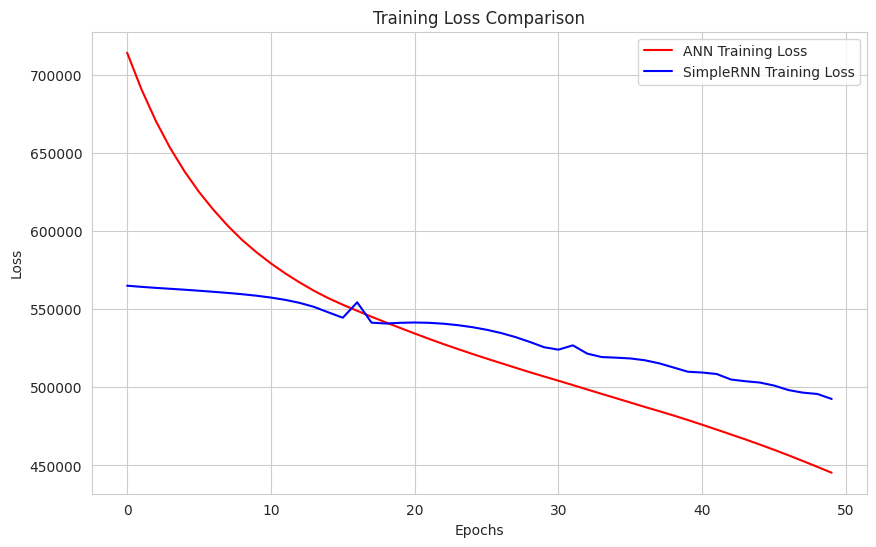

In [165]:
plt.figure(figsize=(10, 6))
plt.plot(results.history['loss'], label='ANN Training Loss', color='red')
plt.plot(results_rnn.history['loss'], label='SimpleRNN Training Loss', color='blue')
# plt.plot(results_lstm.history['loss'], label='LSTM Training Loss', color='orange')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [192]:
products = df_m['Products'].unique()
product = random.choice(products)

# Initialize lists to store predictions and real values
pred_ann = []
pred_rnn = []
real = []

# Get unique months
times = df_m['Month of Sourcing'].unique()

# Iterate over months, excluding the last month
for i in range(len(times) - 1):
    # Filter data for the current and next month
    X_date = df_m[df_m['Month of Sourcing'] == times[i]]
    y_date = df_m[df_m['Month of Sourcing'] == times[i+1]]

    # Extract features for the current month
    X_features = X_date[['Sourcing Cost', 'MA']].values
    print(X_features.shape)

    # Make predictions using the model
    # Reshape X_features to match the expected input shape of the ANN and RNN models
    X_features_ann = X_features.reshape(1, -1)  # For ANN
    X_features_rnn = X_features.reshape(1,192,1)  # For RNN

    pred_ann.append(ann_model.predict(X_features_ann)[0][0])  # For ANN
    pred_rnn.append(rnn_model.predict(X_features_rnn)[0][0])  # For RNN

    # Get the real sourcing cost for the next month
    real.append(y_date[y_date['Products'] == product]['Sourcing Cost'].values[0])



(96, 2)
1/1 [==============================] - 0s 23ms/step
(96, 2)
1/1 [==============================] - 0s 24ms/step
(96, 2)
1/1 [==============================] - 0s 24ms/step
(96, 2)
1/1 [==============================] - 0s 22ms/step
(96, 2)
1/1 [==============================] - 0s 24ms/step
(96, 2)
1/1 [==============================] - 0s 22ms/step
(96, 2)
1/1 [==============================] - 0s 22ms/step
(96, 2)
1/1 [==============================] - 0s 24ms/step
(96, 2)
1/1 [==============================] - 0s 22ms/step
(96, 2)
1/1 [==============================] - 0s 34ms/step
(96, 2)
1/1 [==============================] - 0s 23ms/step


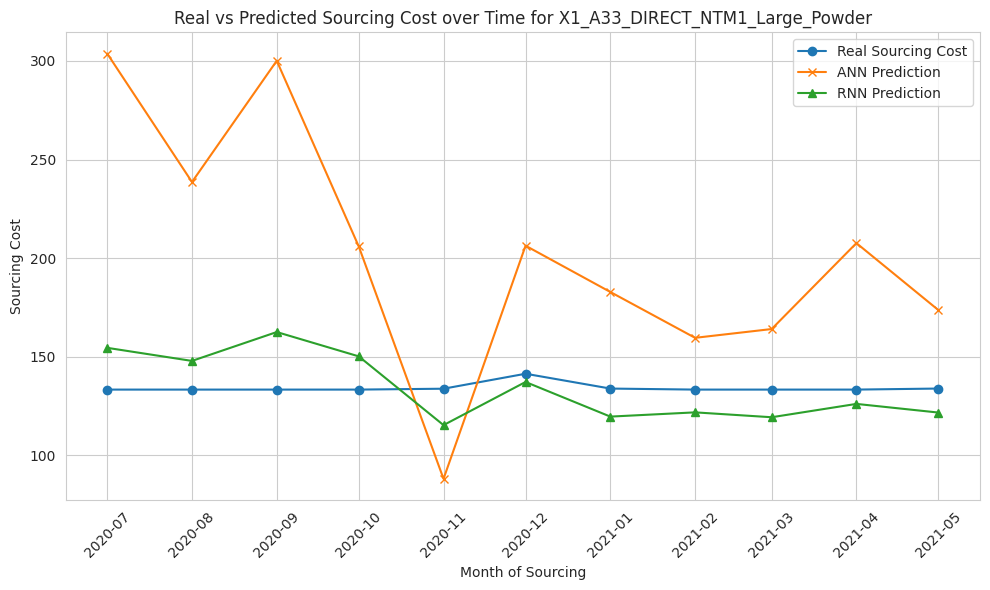

In [193]:
# Plotting
# print(product)
plt.figure(figsize=(10, 6))
plt.plot(times[:-1], real, marker='o', label='Real Sourcing Cost')
plt.plot(times[:-1], pred_ann, marker='x', label='ANN Prediction')
plt.plot(times[:-1], pred_rnn, marker='^', label='RNN Prediction')
plt.title(f'Real vs Predicted Sourcing Cost over Time for {product}')
plt.xlabel('Month of Sourcing')
plt.ylabel('Sourcing Cost')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

RNN performs best as it retains some historical information along with learning new information and hence does not fluctutate like ANN predictions. Incorporate window based model, to take the input of previous three months along with the moving average, to forecast better!

# Product-wise monthly forecast of sourcing costs

In [168]:
master_df = pd.concat([train, test], ignore_index=True)

In [169]:
df = master_df.copy()

In [170]:
df['Products'] = df.apply(lambda row: '_'.join([str(row['ProductType']), str(row['Product Size']), str(row['Product Type'])]), axis=1)
df = df.drop(columns = ['ProductType', 'Product Type', 'Product Size'])
df.head()


,Manufacturer,Area Code,Sourcing Channel,Month of Sourcing,Sourcing Cost,Products
0,X1,A28,WHOLESALE,May-21,10.16,NTM3_Large_Powder
1,X1,A9,DIRECT,Oct-20,134.28,NTM2_Large_Powder
2,X2,A20,DIRECT,Dec-20,12.46,NTM3_Large_Powder
3,X1,A18,WHOLESALE,Feb-21,107.22,NTM3_Small_Powder
4,X1,A28,DIRECT,Nov-20,197.76,NTM2_Large_Liquid


In [171]:
df['Month of Sourcing'] = pd.to_datetime(df['Month of Sourcing'], format='%b-%y')
df = df.sort_values(by='Month of Sourcing')
df.reset_index(drop=True, inplace=True)

In [172]:
df.head()

,Manufacturer,Area Code,Sourcing Channel,Month of Sourcing,Sourcing Cost,Products
0,X1,A5,DIRECT,2020-07-01,135.87,NTM2_Large_Powder
1,X1,A1,DIRECT,2020-07-01,113.44,NTM1_Small_Powder
2,X1,A14,DIRECT,2020-07-01,15.81,NTM3_Large_Liquid
3,X1,A35,DIRECT,2020-07-01,42.80,NTM3_Small_Liquid
4,X2,A31,DIRECT,2020-07-01,106.77,NTM2_Large_Powder


In [173]:
df_modified = df.copy()
df_modified['Count'] = 0
df_modified = df_modified.groupby(['Month of Sourcing', 'Products']).agg({'Sourcing Cost': 'sum', 'Count': 'count'}).reset_index()
df_modified.columns = ['Month of Sourcing', 'Products', 'Total Sourcing Cost', 'Product Count']

df_modified.head()

,Month of Sourcing,Products,Total Sourcing Cost,Product Count
0,2020-07-01,NTM1_Large_Liquid,149373.24,2269
1,2020-07-01,NTM1_Large_Powder,955437.39,8117
2,2020-07-01,NTM1_Small_Powder,669530.64,5576
3,2020-07-01,NTM2_Large_Liquid,96378.98,614
4,2020-07-01,NTM2_Large_Powder,1119897.73,10884


In [174]:
dates = df_modified['Month of Sourcing'].unique()
products = df_modified['Products'].unique()

for product in products:
  sum = 0
  count = 0
  for date in dates:
      # Filter the DataFrame for the specific product and date
      mask = (df_modified['Products'] == product) & (df_modified['Month of Sourcing'] == date)
      subset_df = df_modified[mask]

      # Calculate the sum and count of 'Total Sourcing Cost' and 'Product Count' for the specific product and date
      sum += int(subset_df['Total Sourcing Cost'])
      count += int(subset_df['Product Count'])

      # Calculate the moving average and assign it to the 'MA' column
      moving_avg = sum / count if count != 0 else 0
      df_modified.loc[mask, 'MA'] = moving_avg


<ipython-input-174-f3f9891d1d6a>:13: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  sum += int(subset_df['Total Sourcing Cost'])
<ipython-input-174-f3f9891d1d6a>:14: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  count += int(subset_df['Product Count'])
<ipython-input-174-f3f9891d1d6a>:13: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  sum += int(subset_df['Total Sourcing Cost'])
<ipython-input-174-f3f9891d1d6a>:14: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  count += int(subset_df['Product Count'])


In [175]:
X = []
y = []
dates = df_modified['Month of Sourcing'].unique()

# Iterate over dates, excluding the last date as there is no corresponding 'y' for it
for i in range(len(dates) - 1):
    # Filter data for the current date
    X_date = df_modified[df_modified['Month of Sourcing'] == dates[i]]
    y_date = df_modified[df_modified['Month of Sourcing'] == dates[i+1]]

    # Extract features and target for the current date
    X_features = X_date[['Total Sourcing Cost', 'Product Count', 'MA']].values
    y_target = y_date['Total Sourcing Cost'].values

    # Append features and target to X and y, respectively
    X.append(X_features)
    y.append(y_target)

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Reshape X to have a shape of (num_samples, num_features)
X = X.reshape(X.shape[0], -1)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (11, 33)
Shape of y: (11, 11)


In [176]:

# Define the model architecture
model_ann = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(y.shape[1])  # Output layer with 11 neurons for 11 products
])

# Compile the model
model_ann.compile(optimizer='adam', loss='mse')  # Use mean squared error as loss function

# Train the model
results_ann = model_ann.fit(X, y, epochs=50, batch_size=1, verbose=1)


Epoch 1/50
11/11 [==============================] - 1s 2ms/step - loss: 339906625536.0000
Epoch 2/50
11/11 [==============================] - 0s 2ms/step - loss: 224711311360.0000
Epoch 3/50
11/11 [==============================] - 0s 2ms/step - loss: 144212606976.0000
Epoch 4/50
11/11 [==============================] - 0s 2ms/step - loss: 87045341184.0000
Epoch 5/50
11/11 [==============================] - 0s 2ms/step - loss: 64126558208.0000
Epoch 6/50
11/11 [==============================] - 0s 2ms/step - loss: 59856101376.0000
Epoch 7/50
11/11 [==============================] - 0s 2ms/step - loss: 56925032448.0000
Epoch 8/50
11/11 [==============================] - 0s 3ms/step - loss: 59176534016.0000
Epoch 9/50
11/11 [==============================] - 0s 2ms/step - loss: 56409526272.0000
Epoch 10/50
11/11 [==============================] - 0s 2ms/step - loss: 56413769728.0000
Epoch 11/50
11/11 [==============================] - 0s 2ms/step - loss: 58892328960.0000
Epoch 12/50
11/1

In [177]:
# Define the model architecture for SimpleRNN
model_rnn = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(X.shape[1], 1)),  # Input layer
    Dense(y.shape[1])  # Output layer with 11 neurons for 11 products
])

# Compile the model
model_rnn.compile(optimizer='adam', loss='mse')  # Use mean squared error as loss function

# Train the model
results_rnn = model_rnn.fit(X.reshape(X.shape[0], X.shape[1], 1), y, epochs=50, batch_size=1, verbose=1)


Epoch 1/50
11/11 [==============================] - 1s 5ms/step - loss: 428088066048.0000
Epoch 2/50
11/11 [==============================] - 0s 5ms/step - loss: 410208403456.0000
Epoch 3/50
11/11 [==============================] - 0s 5ms/step - loss: 304549855232.0000
Epoch 4/50
11/11 [==============================] - 0s 6ms/step - loss: 163314565120.0000
Epoch 5/50
11/11 [==============================] - 0s 6ms/step - loss: 141715996672.0000
Epoch 6/50
11/11 [==============================] - 0s 5ms/step - loss: 68373311488.0000
Epoch 7/50
11/11 [==============================] - 0s 5ms/step - loss: 68195282944.0000
Epoch 8/50
11/11 [==============================] - 0s 5ms/step - loss: 81854824448.0000
Epoch 9/50
11/11 [==============================] - 0s 5ms/step - loss: 91160846336.0000
Epoch 10/50
11/11 [==============================] - 0s 5ms/step - loss: 73243402240.0000
Epoch 11/50
11/11 [==============================] - 0s 5ms/step - loss: 117895430144.0000
Epoch 12/50
1

In [178]:
# Define the model architecture for LSTM
model_lstm = Sequential([
    LSTM(64, activation='relu', input_shape=(X.shape[1], 1)),  # Input layer
    Dense(y.shape[1])  # Output layer with 11 neurons for 11 products
])

# Compile the model
model_lstm.compile(optimizer='adam', loss='mse')  # Use mean squared error as loss function

# Train the model
results_lstm = model_lstm.fit(X.reshape(X.shape[0], X.shape[1], 1), y, epochs=100, batch_size=6, verbose=1)

Epoch 1/100
2/2 [==============================] - 2s 25ms/step - loss: 435397722112.0000
Epoch 2/100
2/2 [==============================] - 0s 28ms/step - loss: 431310241792.0000
Epoch 3/100
2/2 [==============================] - 0s 31ms/step - loss: 434438799360.0000
Epoch 4/100
2/2 [==============================] - 0s 27ms/step - loss: 434099421184.0000
Epoch 5/100
2/2 [==============================] - 0s 25ms/step - loss: 432627744768.0000
Epoch 6/100
2/2 [==============================] - 0s 26ms/step - loss: 431125921792.0000
Epoch 7/100
2/2 [==============================] - 0s 32ms/step - loss: 431225339904.0000
Epoch 8/100
2/2 [==============================] - 0s 24ms/step - loss: 432625483776.0000
Epoch 9/100
2/2 [==============================] - 0s 26ms/step - loss: 430196129792.0000
Epoch 10/100
2/2 [==============================] - 0s 23ms/step - loss: 430899625984.0000
Epoch 11/100
2/2 [==============================] - 0s 25ms/step - loss: 429324271616.0000
Epoch 12

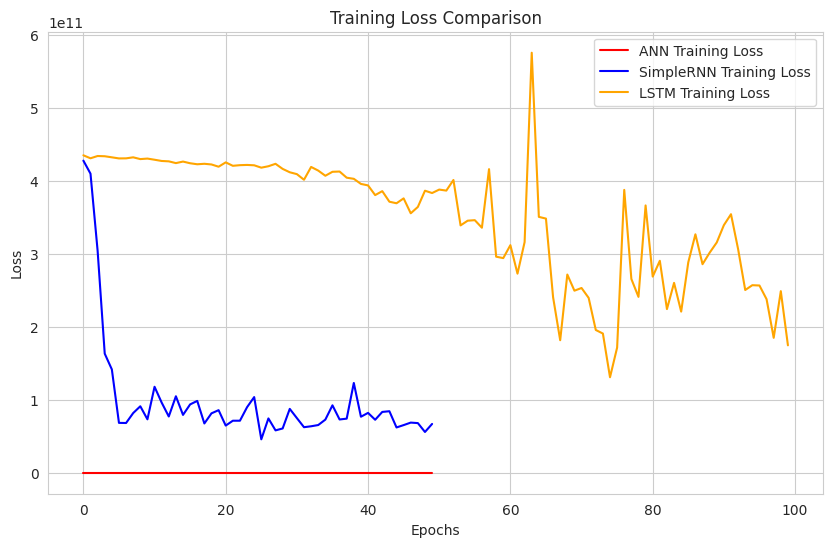

In [179]:
plt.figure(figsize=(10, 6))
plt.plot(results.history['loss'], label='ANN Training Loss', color='red')
plt.plot(results_rnn.history['loss'], label='SimpleRNN Training Loss', color='blue')
plt.plot(results_lstm.history['loss'], label='LSTM Training Loss', color='orange')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [190]:

# Randomly select a product
products = df_modified['Products'].unique()
product = random.choice(products)

# Initialize lists to store predictions and real values
pred_ann = []
pred_rnn = []
pred_lstm = []
real = []

# Get unique months
times = df_modified['Month of Sourcing'].unique()

# Iterate over months, excluding the last month
for i in range(len(times) - 1):
    # Filter data for the current and next month
    X_date = df_modified[df_modified['Month of Sourcing'] == times[i]]
    y_date = df_modified[df_modified['Month of Sourcing'] == times[i+1]]

    # Extract features for the current month
    X_features = X_date[['Total Sourcing Cost', 'Product Count', 'MA']].values
    print(X_features.shape)

    # Make predictions using the models
    pred_ann.append(model_ann.predict(X_features.reshape(1,33))[0][0])  # For ANN
    pred_rnn.append(model_rnn.predict(X_features.reshape(1,33,1))[0][0])  # For RNN
    pred_lstm.append(model_lstm.predict(X_features.reshape(1, 33, 1))[0][0])  # For LSTM

    # Get the real total sourcing cost for the next month
    real.append(y_date[y_date['Products'] == product]['Total Sourcing Cost'].values[0])


(11, 3)
1/1 [==============================] - 0s 23ms/step
(11, 3)
1/1 [==============================] - 0s 22ms/step
(11, 3)
1/1 [==============================] - 0s 27ms/step
(11, 3)
1/1 [==============================] - 0s 25ms/step
(11, 3)
1/1 [==============================] - 0s 22ms/step
(11, 3)
1/1 [==============================] - 0s 22ms/step
(11, 3)
1/1 [==============================] - 0s 21ms/step
(11, 3)
1/1 [==============================] - 0s 23ms/step
(11, 3)
1/1 [==============================] - 0s 22ms/step
(11, 3)
1/1 [==============================] - 0s 22ms/step
(11, 3)
1/1 [==============================] - 0s 23ms/step


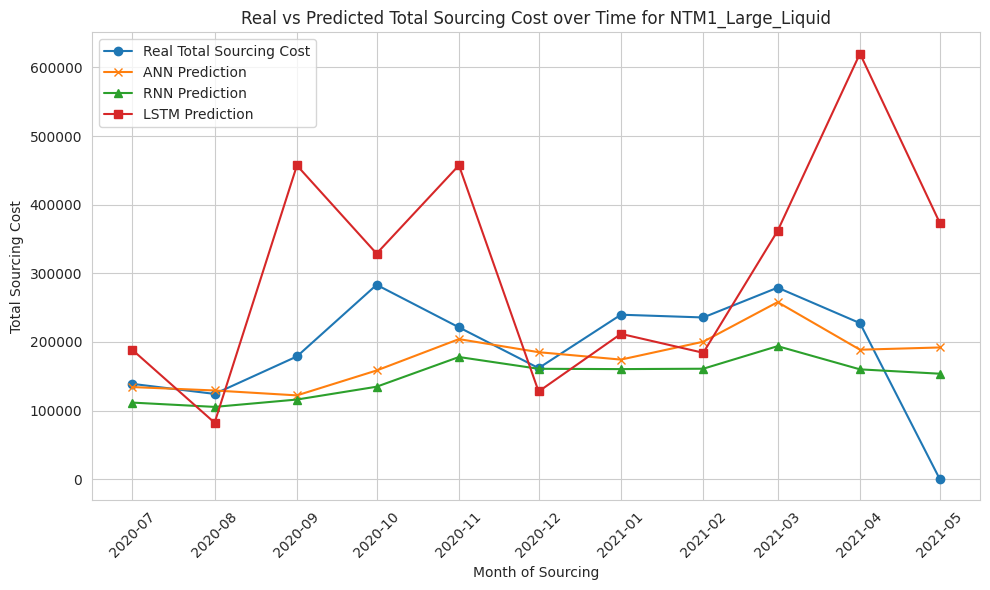

In [191]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(times[:-1], real, marker='o', label='Real Total Sourcing Cost')
plt.plot(times[:-1], pred_ann, marker='x', label='ANN Prediction')
plt.plot(times[:-1], pred_rnn, marker='^', label='RNN Prediction')
plt.plot(times[:-1], pred_lstm, marker='s', label='LSTM Prediction')
plt.title(f'Real vs Predicted Total Sourcing Cost over Time for {product}')
plt.xlabel('Month of Sourcing')
plt.ylabel('Total Sourcing Cost')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

All model including LSTM is able to capture the seasonality from the training data and RNN and ANN models are the closest to making appropriate predictions.

Future Work: Window based seq 2 seq forecasting might potentially reduce the mse between data points while capturing the seasonality

Plots

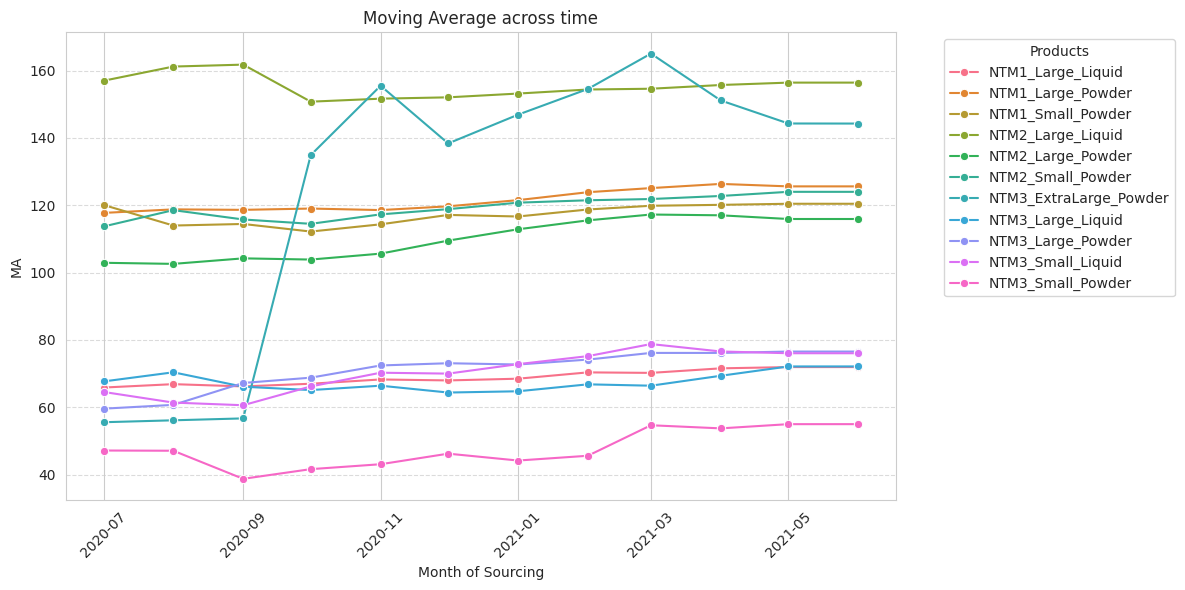

In [182]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_modified, x='Month of Sourcing', y='MA', hue='Products', marker='o')

plt.title('Moving Average across time')
plt.xlabel('Month of Sourcing')
plt.ylabel('MA')
plt.xticks(rotation=45)
plt.legend(title='Products', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

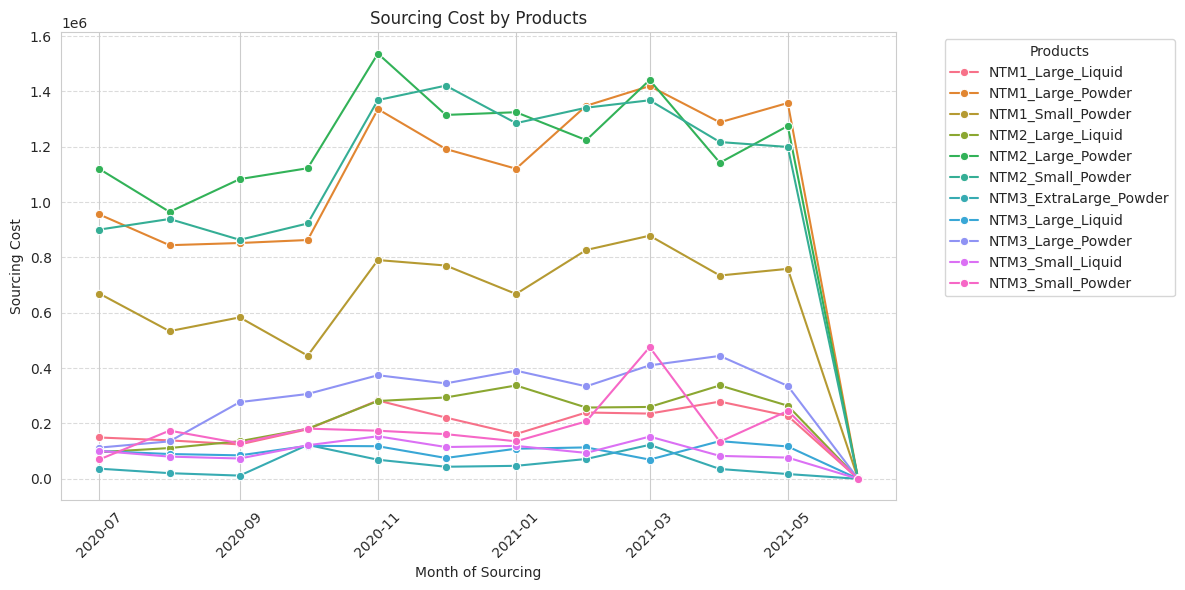

In [183]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_modified, x='Month of Sourcing', y='Total Sourcing Cost', hue='Products', marker='o')

plt.title('Sourcing Cost by Products')
plt.xlabel('Month of Sourcing')
plt.ylabel('Sourcing Cost')
plt.xticks(rotation=45)
plt.legend(title='Products', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

can use AWS forecast for each product - can set it up to train on real time using the AWS workspace. Can extract forecasts in quantile format for better understanding.

Statistical Methods like SARIMA and Exponential Smoothening collapse in long forecasts and start repeating patterns.

RNN or LSTM based model learn intra and inter forecasting features and can be effective in performing long term forecasts. Hyperparameter finetuning will yield good results
